# Vaibhavi Kundle

# TASK 3: Exploratory Data Analysis - Retail

# 1.Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
# 2.As a business manager, try to find out the weak areas where you can work to make more profit.
# 3.What all business problems you can derive by exploring the data?


In [1]:
#importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
#Reading the dataset

df = pd.read_csv("SampleSuperstore.csv")

#printing the forst 5 rows of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# checking the shape
df.shape

(9994, 13)

In [7]:
#check data type of columns/attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
#describe the datset in terms of mean,min,max,count etc.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#checking for any null values in the columns
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# Checking the number of duplicate rows in the datset
df.duplicated().sum()

17

In [12]:
# removing these duplicates from the dataset
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
# checking again the shape of datset after duplicates are removed
df.shape

(9994, 13)

In [14]:
# Count distinct observations
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
#dropping country column as there is only one unique value
df = df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
df['Category'].unique() #3 unique values for categories of products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [19]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [20]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

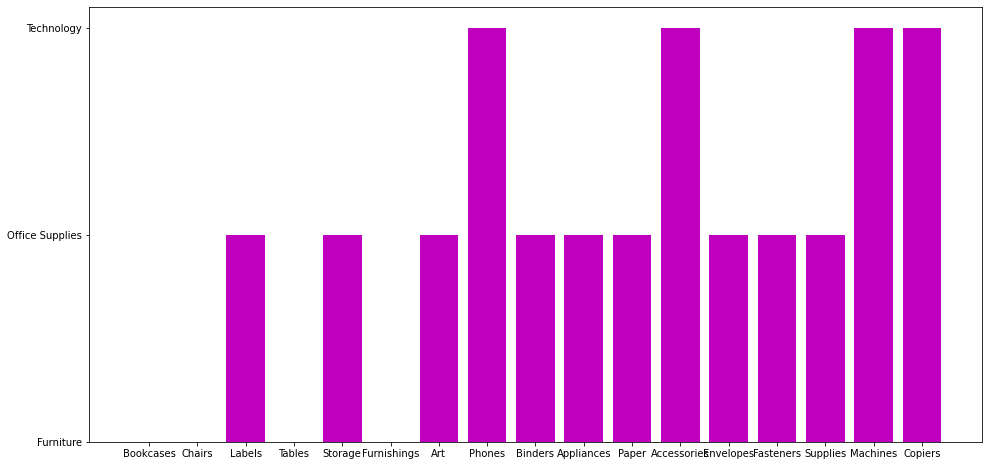

In [21]:
#Visualization of sub-categories  distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='m')
plt.show()

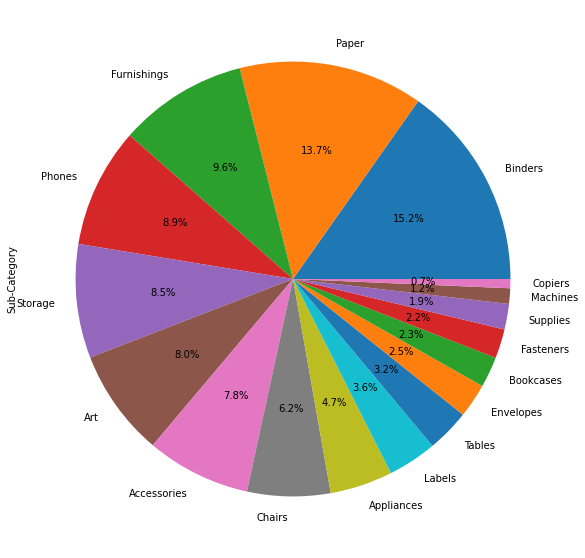

In [22]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-23-c3cea094cfd6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


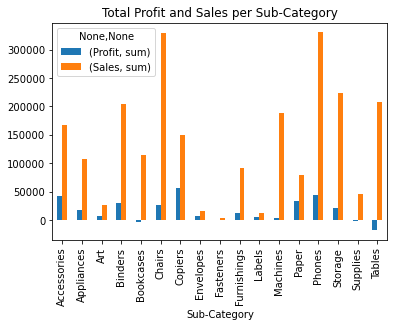

In [23]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

# Most profit was earned in copiers.Sales of chairs and phones were extremly hight compared to others.
# We can also infer that the demand for Tables and bookcases is extremely low or no demand at all

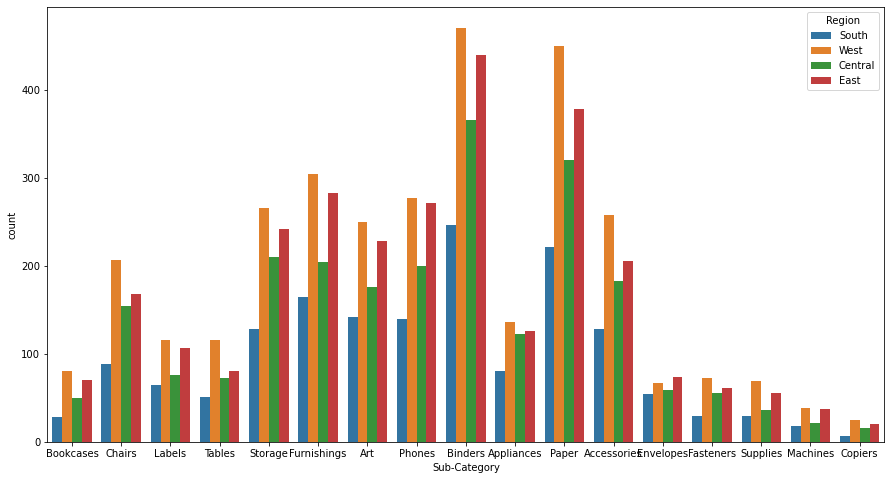

In [25]:
#Count of Sub-Category region wise
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

#We can infer from below that people from western parts tend to order more and
#people from southersn part of USA order less from the superstore

In [26]:
df['Cost'] = df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [27]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [28]:
#Category of products with high Profit Percentage 
df.sort_values(['Profit %','Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.9900,100.000000
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
4029,Standard Class,Consumer,Lafayette,Louisiana,70506,South,Technology,Machines,479.970,3,0.0,239.9850,239.9850,100.000000
5068,Standard Class,Home Office,Trenton,Michigan,48183,Central,Technology,Copiers,549.990,1,0.0,274.9950,274.9950,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


# Technology category consisteing of machines, ohones and Copiers have 100% profit

C:\Users\laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


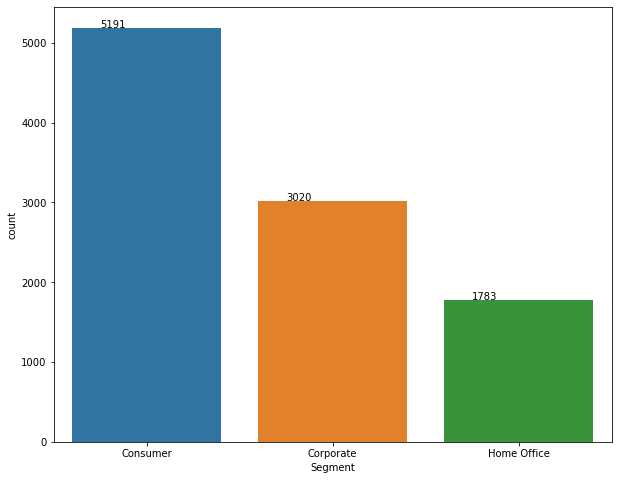

In [29]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

# In Conclusion we can derive that

1.Tables and Bookcases departments from Superstore are in loss.
So it will better to keep the stock low for these items and not invest in it furthermore. OR Implement measures to make more profit in these areas.

2.People residing in Western part of US tend to order more from superstore.

3.People from southern part buy less so we can find ways to increase the sales in the said area.

4.Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

5.The distribution is highest in Consumer Segment. 